**Questão 1)** Na documentação da OpenCV é possı́vel encontrar diversos detectores e descritores 1 . Usando um conjunto com pelo menos 6 imagens (você pode tirar fotos com seu telefone, por exemplo), experimente três detectores distintos nestas imagens, incluindo o detector de Harris. Pesquise e descreva resumidamente com suas palavras (até 200 palavras para cada) como cada um funciona, incluindo seus parâmetros e quais suas principais diferenças. Exiba resultados nas suas imagens, e em quais situações cada um funciona bem ou mal. Discuta seus parâmetros. Qual deles você achou melhor? Justifique.

In [38]:
import os
import glob
import cv2
import numpy
from matplotlib import pyplot

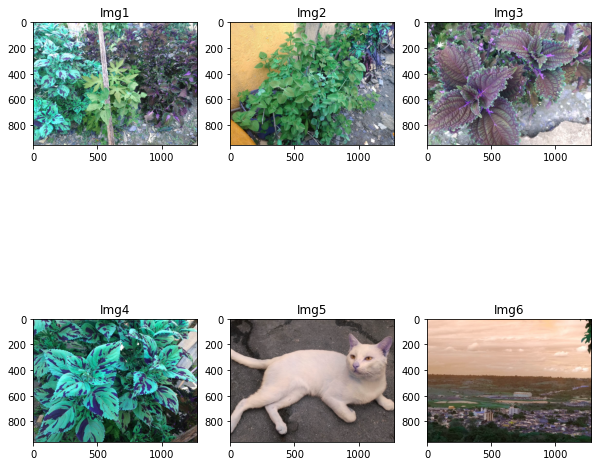

In [39]:
# Read files in order: https://bit.ly/2KCRqbz
img_files = glob.glob("./imagens/*.jpg")
img_files.sort()

img = [cv2.imread(img) for img in img_files]

pyplot.subplot(2, 3, 1), pyplot.imshow(img[0]), pyplot.title('Img1')
pyplot.subplot(2, 3, 2), pyplot.imshow(img[1]), pyplot.title('Img2')
pyplot.subplot(2, 3, 3), pyplot.imshow(img[2]), pyplot.title('Img3')
pyplot.subplot(2, 3, 4), pyplot.imshow(img[3]), pyplot.title('Img4')
pyplot.subplot(2, 3, 5), pyplot.imshow(img[4]), pyplot.title('Img5')
pyplot.subplot(2, 3, 6), pyplot.imshow(img[5]), pyplot.title('Img6')

pyplot.gcf().set_size_inches((10, 10))
pyplot.show()

In [40]:
# BGR to RGB
grayscale = [cv2.cvtColor(img_f, cv2.COLOR_BGR2GRAY) for img_f in img]

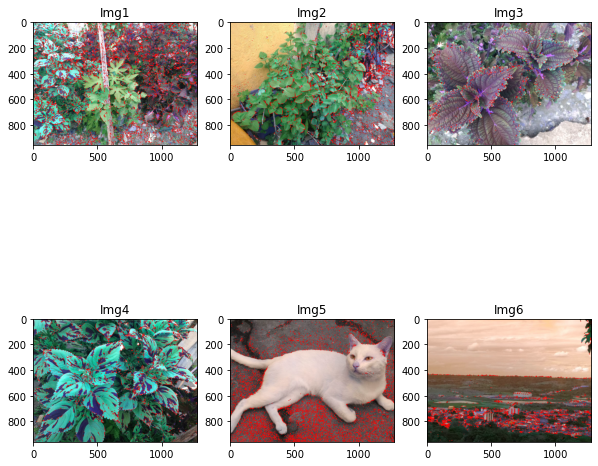

In [41]:
# Transformando em numpy
grayscale_np = [numpy.float32(img) for img in grayscale]

# Aplicando o filtro de Harris
corner_harris = [cv2.cornerHarris(gray, 2, 3, 0.04) for gray in grayscale_np]

# Marcando os pontos
corner_harris = [cv2.dilate(dst,None) for dst in corner_harris]

# Marcando o threshold para o valor ótimo com a cor vermelha [255, 0, 0]
for i in range(len(img)):
    img[i][corner_harris[i] > 0.01*corner_harris[i].max()] = [255, 0, 0]

pyplot.subplot(2, 3, 1), pyplot.imshow(img[0]), pyplot.title('Img1')
pyplot.subplot(2, 3, 2), pyplot.imshow(img[1]), pyplot.title('Img2')
pyplot.subplot(2, 3, 3), pyplot.imshow(img[2]), pyplot.title('Img3')
pyplot.subplot(2, 3, 4), pyplot.imshow(img[3]), pyplot.title('Img4')
pyplot.subplot(2, 3, 5), pyplot.imshow(img[4]), pyplot.title('Img5')
pyplot.subplot(2, 3, 6), pyplot.imshow(img[5]), pyplot.title('Img6')

pyplot.gcf().set_size_inches((10, 10))
pyplot.show()

In [ ]:
# Shi-Tomasi Corner Detector 
# (paper Good Features to Track: https://ieeexplore.ieee.org/abstract/document/323794)
# Aplicando o filtro Shi-Thomas
shi_thomas_corner = [cv.goodFeaturesToTrack(gray,25, 0.01, 10) for gray in grayscale]

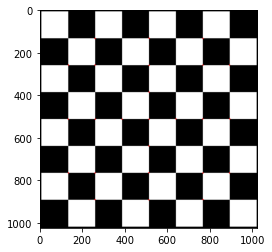

(<matplotlib.image.AxesImage at 0x7f5168712220>, None)

In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./imagens/chessboard.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()